# Overview of this jupyter notebook

### Purpose: Data understanding of each classes without data modification
1. Loading screwing data 
2. Rise point of the curves
3. Maximum value of the curves
4. Rename files

In [1]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tq
import importlib
from library import etl_data as etl        # this module contains functions that load, visualize and save the data
from library import faps_color as fapsc    # this module contains the color combination of FAPS Institute
print(importlib.reload(etl))
print(importlib.reload(fapsc))

<module 'library.etl_data' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\etl_data.py'>
<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\faps_color.py'>


## 1. Loading screwing data

In [2]:
main_path = "..\\03_Schraubprozessdaten\\einzelne_klassen\\"
folders = os.listdir(main_path)
fname = "\\ast11-graph"
fname_new = "\\class6_"

In [3]:
folders

['0_in_ordnung',
 '1_kleine_durchgangsbohrung_v2',
 '2_falsch_ausgerichtete_fuegepartner_v3',
 '3_unebene_fuegeflaeche',
 '4_verunreinigtes_gewinde',
 '5_verschmutzte_schraube',
 '6_fremdkoerper_am_gewindeende',
 '7_beschaedigte_schraube']

In [4]:
class6 = '6_fremdkoerper_am_gewindeende'

In [5]:
def set_time(df, len_curves):
    
    original_time_step = 0.000175
    max_time = max(len_curves)*original_time_step
    len_datapoints = len(df)
    time_steps = round(max_time/len_datapoints, 4)
    
    timeline = []

    for i in range(len_datapoints):
        i = round(i*time_steps, 4)
        timeline.append(i)
        
    return np.array(timeline).reshape(-1, 1)

In [6]:
def load_data(main_path, folders, fname, downsample):
    
    arr = []
    len_curves = []
    short_curves = []
    low_curves = []
    high_curves = []
    
    for i in tq(range(200)):
        try:
            file_path = main_path + folders + fname + str(i) + ".csv"
            data = pd.read_csv(file_path, encoding = 'ISO-8859-1')["Drehmoment(N·m)"]
            arr.append(data)
            len_curves.append(len(data))
        except:
            print(i)
        
    for index, length in enumerate(len_curves): 
        if length < np.max(len_curves)*0.8:
            short_curves.append(index)
        
    df = pd.concat(arr, axis=1, ignore_index=True)
    df = df[:][::downsample]
    df = df.reset_index(drop=True)
    df[df < 0] = np.nan
    df = df.fillna(0)
    
    for col in df:
        if max(df[col]) < 1.0:
            low_curves.append(col)
        elif max(df[col]) > 1.4:
            high_curves.append(col)
    
    return df, len_curves, short_curves, low_curves, high_curves

In [7]:
df6, len_curves6, short_curves6, low_curves6, high_curves6 = load_data(main_path, class6, fname_new, downsample=20)

  0%|          | 0/200 [00:00<?, ?it/s]

In [8]:
df6

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.00896,0.02240,0.01792,0.02688,0.01792,0.00448,0.00896,0.01792,0.04032,0.01792,...,0.00896,0.02240,0.01344,0.01792,0.02240,0.00448,0.00000,0.00896,0.00896,0.02240
1,0.00896,0.02240,0.01792,0.02688,0.01792,0.00448,0.00896,0.01792,0.03584,0.01792,...,0.00896,0.01792,0.00896,0.01792,0.02240,0.00448,0.00000,0.00448,0.00896,0.02240
2,0.01344,0.02240,0.00896,0.01344,0.01344,0.00896,0.01344,0.00448,0.01344,0.00448,...,0.00448,0.00000,0.00000,0.01344,0.01344,0.00896,0.00000,0.00000,0.00000,0.00896
3,0.00448,0.00448,0.00448,0.00448,0.00896,0.00448,0.00448,0.00000,0.00896,0.00448,...,0.00000,0.00000,0.00000,0.00896,0.00448,0.00448,0.00000,0.00000,0.00000,0.00448
4,0.01344,0.02240,0.01344,0.00896,0.01344,0.01344,0.01344,0.00448,0.01344,0.00896,...,0.00448,0.00896,0.00000,0.01344,0.01344,0.00896,0.00448,0.00448,0.00000,0.01344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
739,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
740,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
741,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [9]:
short_curves6

[]

In [10]:
low_curves6

[]

In [11]:
high_curves6

[]

In [12]:
sorted(set(short_curves6 + low_curves6 + high_curves6))

[]

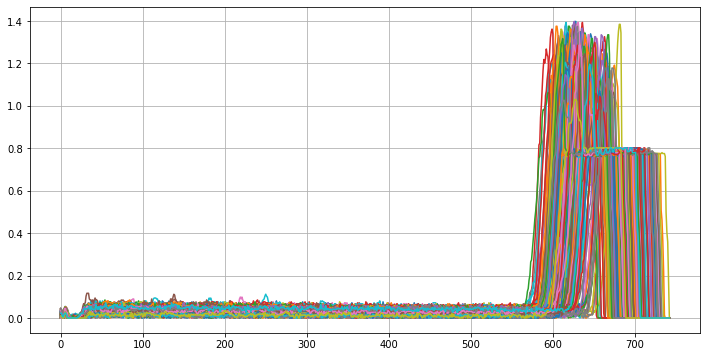

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df6)
plt.grid()
plt.show()

## 2. Rise point of the curves

In [14]:
raise_point = []

for col in df6:
    for i, val in enumerate(df6[col]):
        if val > 1:
            raise_point.append(i)
            break

In [15]:
np.mean(raise_point)

627.555

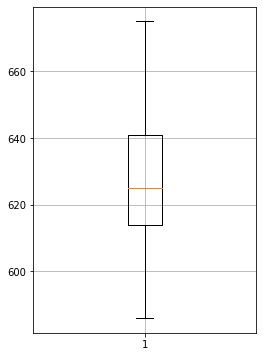

In [16]:
plt.figure(figsize=(4,6))
plt.boxplot(raise_point)
plt.grid()
plt.show()

## 3. Maximum value of the curves 

In [17]:
max_values = []

for col in df6:
    max_values.append(max(df6[col]))

In [18]:
np.mean(max_values)

1.2296255999999999

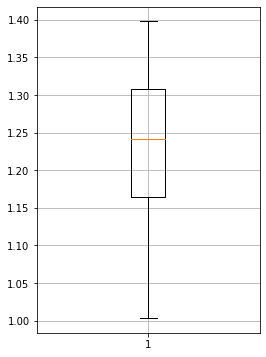

In [19]:
plt.figure(figsize=(4,6))
plt.boxplot(max_values)
plt.grid()
plt.show()

## 4. Rename files

In [33]:
def rename_csv(main_path, folder, fname_new, file_amount):
    
    for i in range(file_amount):
        old = os.path.join(main_path, folder, os.listdir(main_path + folder)[i])
        new = os.path.join(main_path, folder, fname_new + str(i) + ".csv")
        #print(i)
        os.rename(old, new)

In [34]:
old = os.path.join(main_path, class6, os.listdir(main_path + class6)[0])
old

'..\\Daten\\einzelne_klassen\\6_fremdkoerper_am_gewindeende\\rename (1).csv'

In [35]:
new = os.path.join(main_path, class6, "class6_" + str(0) + ".csv")
new

'..\\Daten\\einzelne_klassen\\6_fremdkoerper_am_gewindeende\\class6_0.csv'

In [36]:
#rename_csv(main_path, class6, "class6_", file_amount=200)